<a href="https://colab.research.google.com/github/aksfasale/eda_hotel_booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HOTEL BOOKING ANALYSIS**






# Problem Statement

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

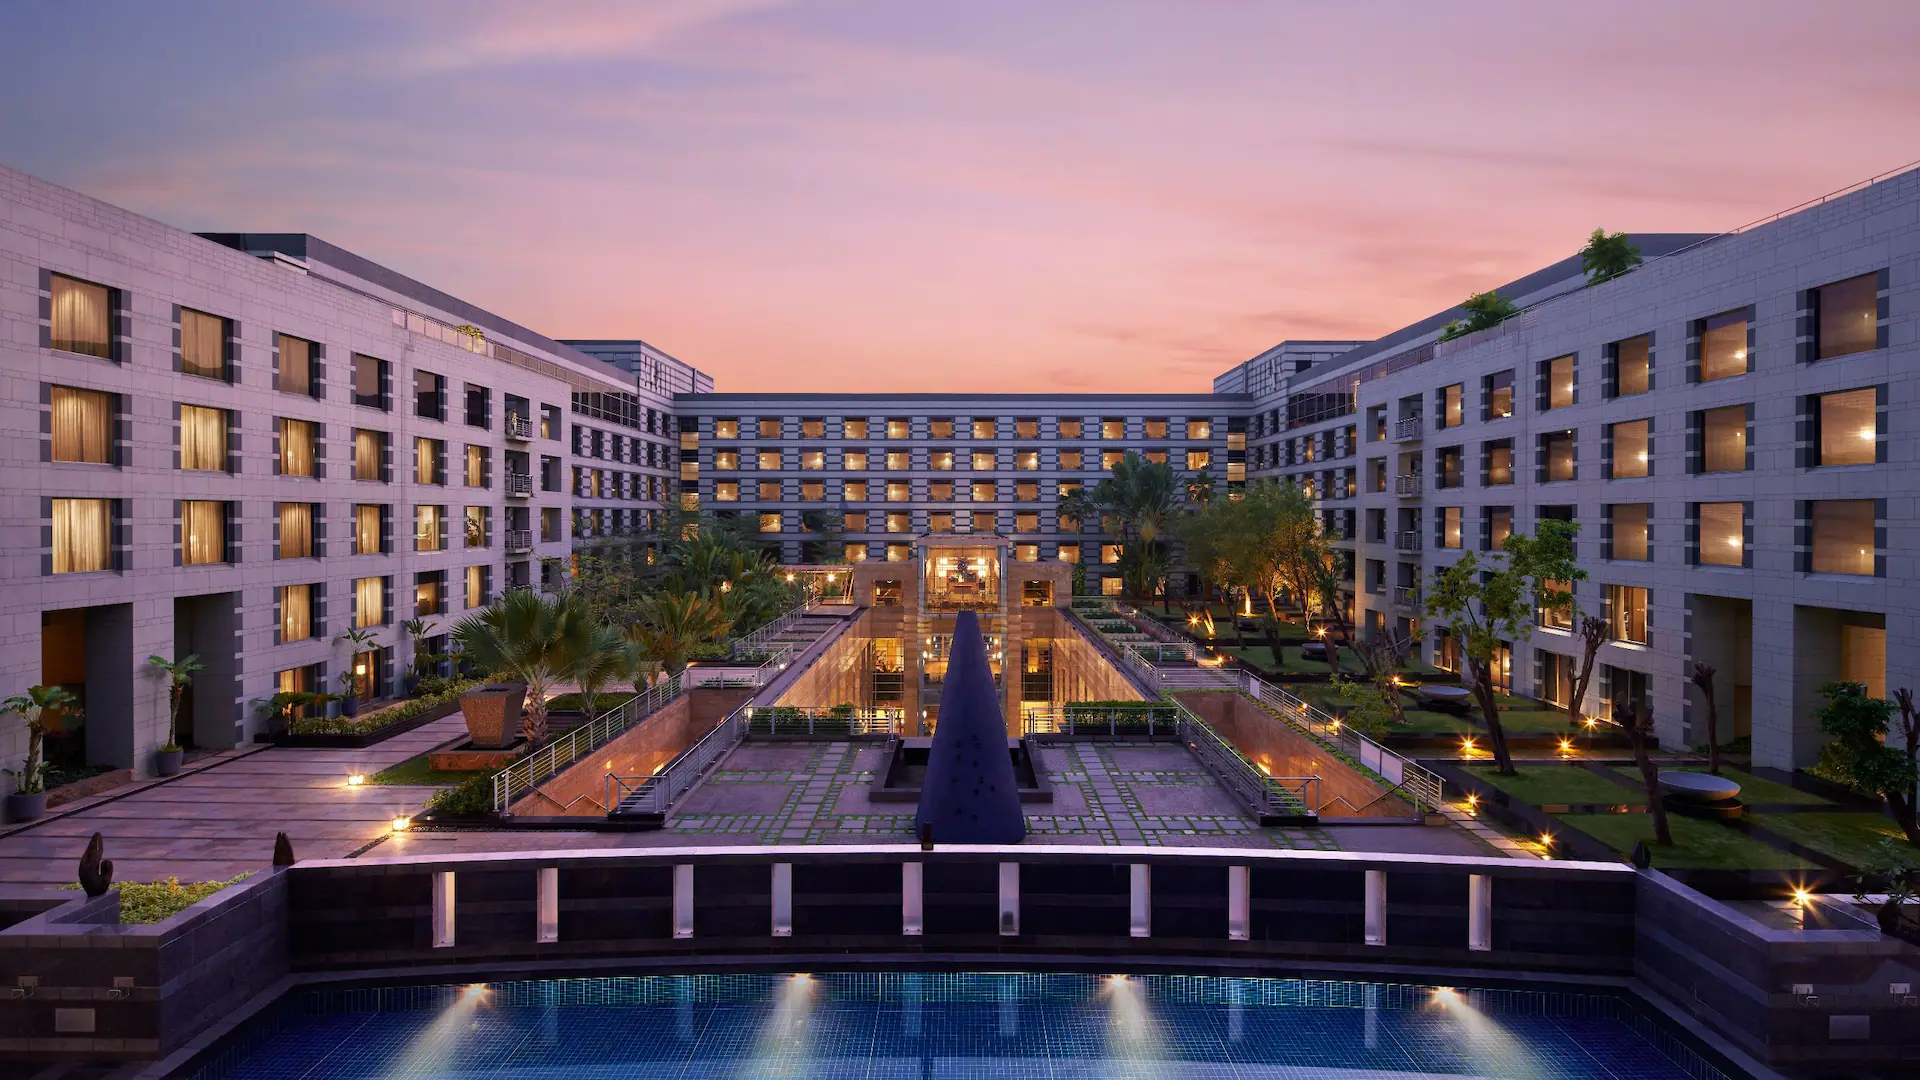

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Early Analysis, Data Reading 

In [4]:
hotel_booking_df = pd.read_csv('/content/drive/MyDrive/EDA - Hotel Booking Analysis/Hotel Bookings.csv')

In [4]:
hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
hotel_booking_df.shape

(119390, 32)

INFORMATION ABOUT HEAD

In [6]:
hotel_booking_df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
hotel_booking_df.tail()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Getting the information about the dataset and checking the datatypes and the values present. Also finding wheather having null values or not.

In [8]:
hotel_booking_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
hotel_booking_df.columns 

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Checking for null values and their count.

In [10]:
hotel_booking_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Creating New Copy and Making the required changes 

In [5]:
h_book_df = hotel_booking_df.copy()

# Data Preprocessing and Cleaning

In [12]:
h_book_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Renaming the column, with a meaningfull Name 

In [13]:
h_book_df.rename(columns ={'adr' : 'Average_daily_rate'},inplace =True)  

In [14]:
h_book_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [15]:
h_book_df.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


Replacing the null values of agent, company and children.

In [16]:
#Replacing null values
h_book_df['children'].fillna(h_book_df.children.mean(), inplace = True)
h_book_df['children'] = h_book_df['children'].astype(int)    #converting the data type of children column to int
h_book_df['company'].fillna(0 , inplace = True)
h_book_df['company'].astype(int)                            #converting the data type of company column to int
h_book_df['agent'].fillna(0 , inplace = True)
h_book_df['agent'].astype(int)                               #converting the data type of agent column to int
h_book_df['country'].fillna('Other',inplace = True)

Checking for the Duplicate Rows and Removing them.

In [17]:
h_book_df.duplicated().value_counts()    

False    87396
True     31994
dtype: int64

In [18]:
h_book_df.drop_duplicates(inplace=True)

In [19]:
h_book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

In [20]:
h_book_df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,53428,NaN,NaN,NaN,11257,NaN,NaN,NaN,NaN,NaN,...,86251,NaN,NaN,NaN,71986,NaN,NaN,NaN,63371,211
mean,NaN,0.274898,79.891368,2016.210296,NaN,26.838334,15.815541,1.005263,2.625395,1.875795,...,NaN,81.004657,11.016809,0.749565,NaN,106.337246,0.084226,0.698567,NaN,NaN
std,NaN,0.446466,86.052325,0.686102,NaN,13.674572,8.835146,1.031921,2.053584,0.626500,...,NaN,109.945638,54.047484,10.015731,NaN,55.013953,0.281533,0.831946,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,0.000000,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,9.000000,0.000000,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,...,NaN,234.000000,0.000000,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN


### Here are some rows where the sum of the total number of adults, children, or babies is zero. The rows containing such information will be removed

In [65]:
h_book_df[h_book_df.adults + h_book_df.babies + h_book_df.children == 0].shape

(0, 32)

In [66]:
h_book_df.drop(h_book_df[h_book_df.adults + h_book_df.babies + h_book_df.children == 0].index, inplace = True)  #Removing rows where total is 0.

##Creating new columns

In [15]:
h_book_df["Total_members"] = h_book_df.adults + h_book_df.children + h_book_df.babies 

h_book_df["Total_stay"]= h_book_df.stays_in_weekend_nights + h_book_df.stays_in_week_nights

In [22]:
h_book_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

In [23]:
h_book_df.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_members,Total_stay
count,87396,87396.000000,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396,87396.000000,87396.000000,87396.000000,87396,87396,87396.000000,87396.000000
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,3,926,NaN,NaN
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14,NaN,NaN
freq,53428,NaN,NaN,NaN,11257,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,71986,NaN,NaN,NaN,63371,211,NaN,NaN
mean,NaN,0.274898,79.891368,2016.210296,NaN,26.838334,15.815541,1.005263,2.625395,1.875795,...,11.016809,0.749565,NaN,106.337246,0.084226,0.698567,NaN,NaN,2.025253,3.630658
std,NaN,0.446466,86.052325,0.686102,NaN,13.674572,8.835146,1.031921,2.053584,0.626500,...,54.047484,10.015731,NaN,55.013953,0.281533,0.831946,NaN,NaN,0.794319,2.763449
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,NaN,72.000000,0.000000,0.000000,NaN,NaN,2.000000,2.000000
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,NaN,98.100000,0.000000,0.000000,NaN,NaN,2.000000,3.000000
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,...,0.000000,0.000000,NaN,134.000000,0.000000,1.000000,NaN,NaN,2.000000,5.000000


# Data and Information Visualization



### Removing an outlier from 'Average_daily_rate'

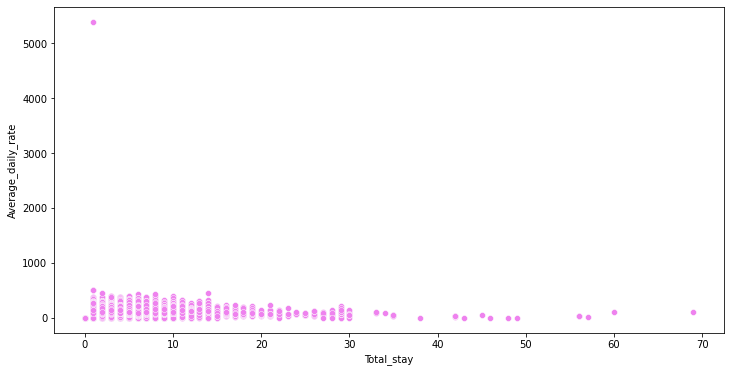

In [54]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Average_daily_rate', x = 'Total_stay', data = h_book_df,color='violet')
plt.show()

Removing all values > 5000 

In [58]:
h_book_df.drop(h_book_df[h_book_df['Average_daily_rate'] > 5000].index, inplace = True) 

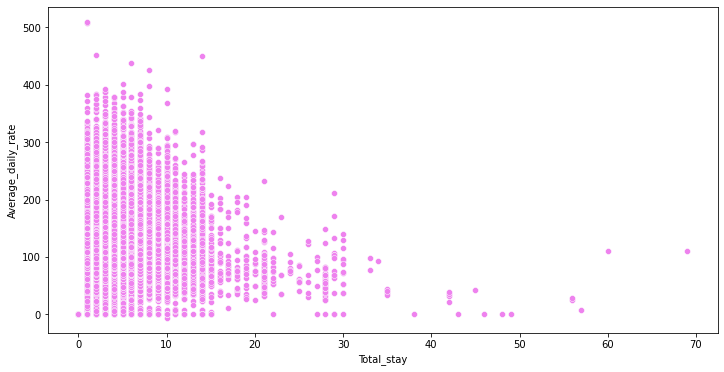

In [62]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Average_daily_rate', x = 'Total_stay', data = h_book_df,color='violet')
plt.show()

From the scatter plot we can see that as length of Full_stay increases the Average_daily_rate decreases. This means for longer stay, the better deal for customer can be finalised.


## Correlation between the numerical data

To begin with, find a correlation between the numerical data. Additionally, we have added columns for Full_stay and Total_members. As a result, we can remove columns for adults, children, and babies, as well as stays_in_weekend_nights, and stays_in_weeknights.

In [64]:
Corel_df = h_book_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','Average_daily_rate','required_car_parking_spaces','total_of_special_requests','Total_stay','Total_members']]

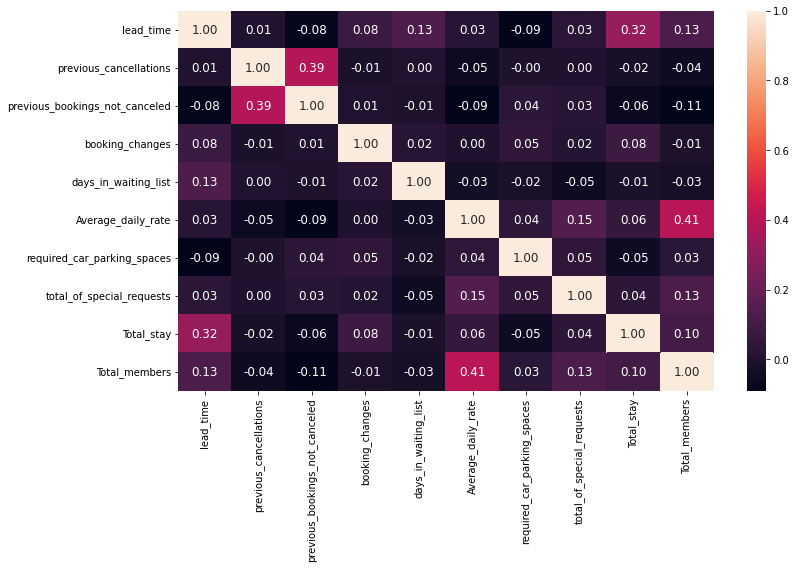

In [78]:
corr_mat = Corel_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr_mat,robust=True,annot = True,fmt='.2f', annot_kws={'size':12},vmax=1,square=False);

1-->Full_stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2--> Average_daily_rate is slightly correlated with Total_members, which makes sense as more no. of people means more revenue, therefore more Average_daily_rate.

## Hotel Types ..!! and It's Percentage 

In [62]:
hotel_type =h_book_df['hotel'].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Text(0.5, 1.0, 'Hotel Type')

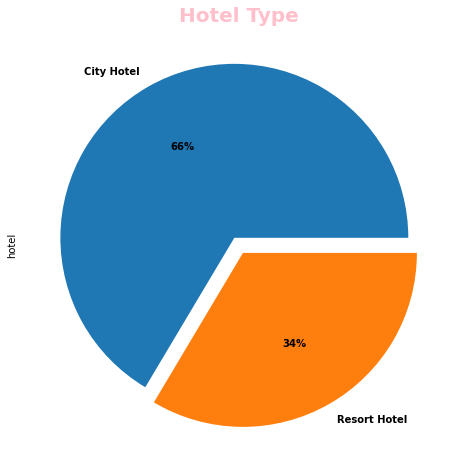

In [64]:
Hotel_ratio = hotel_type.plot.pie(x='City Hotel', y ='Resort Hotel',explode=[0.05, 0.05],autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(8,8)) 
plt.title('Hotel Type',color='Pink',fontweight='bold',size=20)

## Hotel Wise Bookings based on Month and year

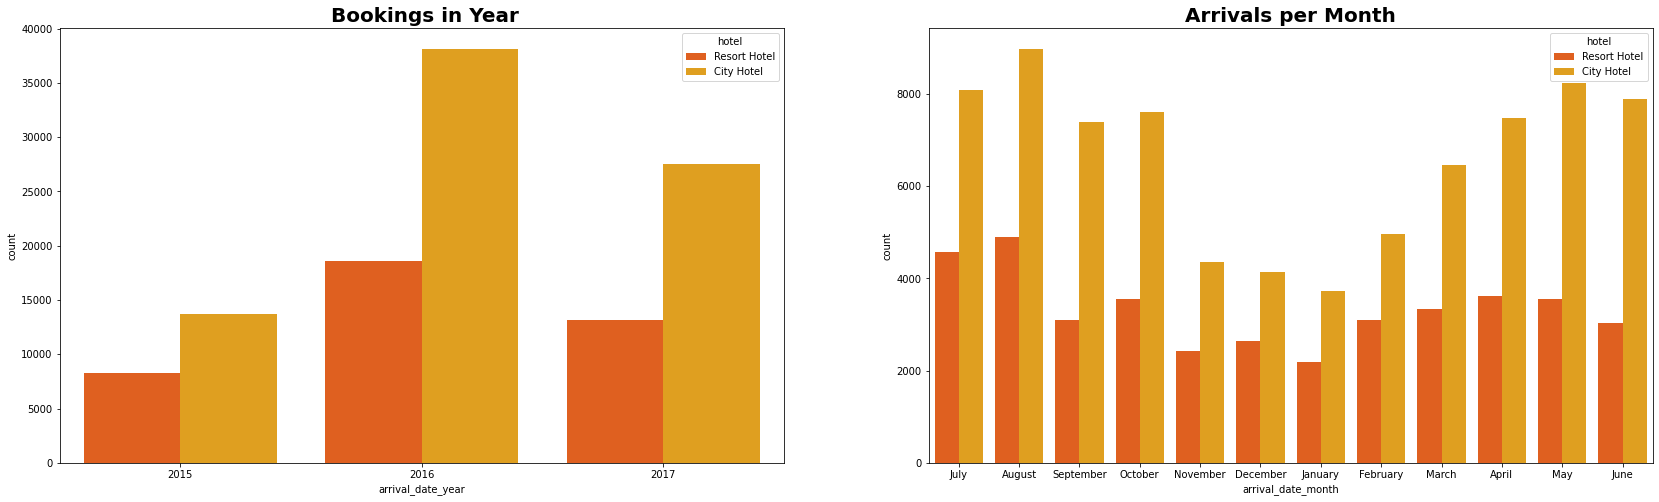

In [66]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1 )
sns.countplot(x= 'arrival_date_year', data= h_book_df,palette='autumn', hue= 'hotel').set_title (' Bookings in Year',fontweight="bold", size=20,)
plt.subplot(1,2,2)
sns.countplot(data = h_book_df, x = 'arrival_date_month',hue ='hotel',palette='autumn')
plt.title('Arrivals per Month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.6)

## Favourite Meal Type Preffered 

Text(0.5, 1.0, 'Favourite Meal Type')

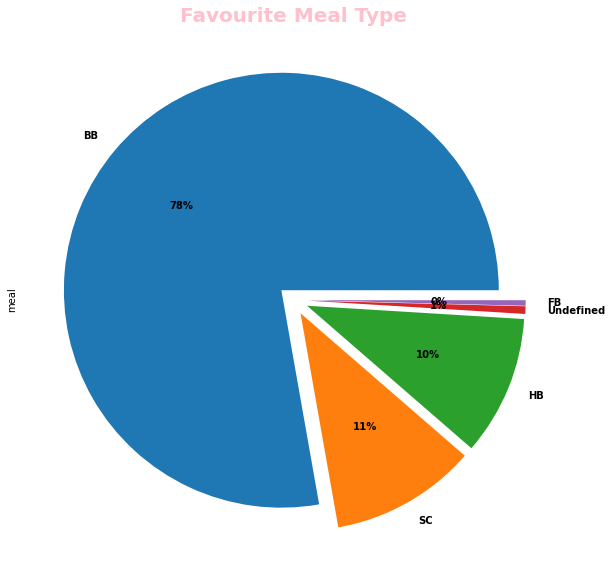

In [35]:
meal_typ =h_book_df['meal'].value_counts()
Food_type_ratio = meal_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},figsize =(10,10),explode=[0.07, 0.07,0.07,0.07,0.07])
plt.title('Favourite Meal Type', color='Pink',fontweight='bold', size=20)

**BB-Bed and Breakfast**( in which breakfast included in the price of the hotel.).  **HB-Half Board** (in which dinner are included in the pricce of hotel). **FB--Full Board** (in which breakfast, lunch and dinner are included). **SC--Self Catering**( Meals not included in the price, but guests have access to the kitche, where they can prepare the meals on their own)

The most favourite meal, type is the one which **78%** of people prefer **'BB'** type meal.

## Country Wise - Number of Bookings

### Total Unique Countries 

In [47]:
h_book_df.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 87396, dtype: object

### Selecting **Top 20 Countries**, with highest number of bookings and Visualization

In [41]:
h_book_df.country.value_counts().head(20)

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: country, dtype: int64

Text(0.5, 1.0, 'Number of bookings - Country Wise(Top 20)')

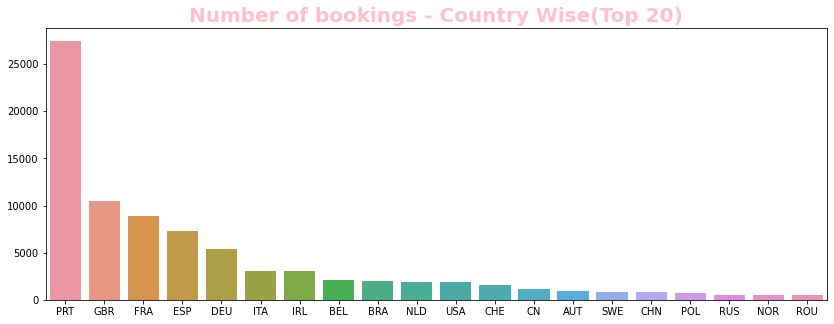

In [87]:
plt.figure(figsize = (14,5))
sns.barplot (y= list(h_book_df.country.value_counts().head (20)), x= list(h_book_df.country.value_counts().head(20).index))
plt.title("Number of bookings - Country Wise(Top 20)",fontweight="bold", size=20,color='Pink')

From the above graph, most guests are coming from 'PRT' i.e Portugal

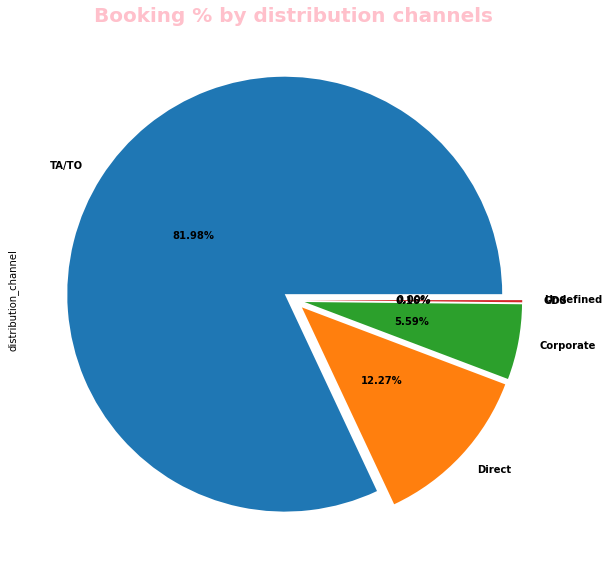

In [71]:
booking_distibution_typ =h_book_df['distribution_channel'].value_counts()
# plt.pie(x=h_book_df, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
booking_distributuion_type_ratio =booking_distibution_typ.plot.pie(autopct='%.2f%%',textprops={'weight': 'bold'},figsize =(10,10), pctdistance=0.5,explode = [0.05]*5)
plt.title("Booking % by distribution channels",fontweight="bold", size=20,color='Pink');

### Agent Making Maximum Bookings ...???

Text(0.5, 1.0, 'Bookings Done by Agents')

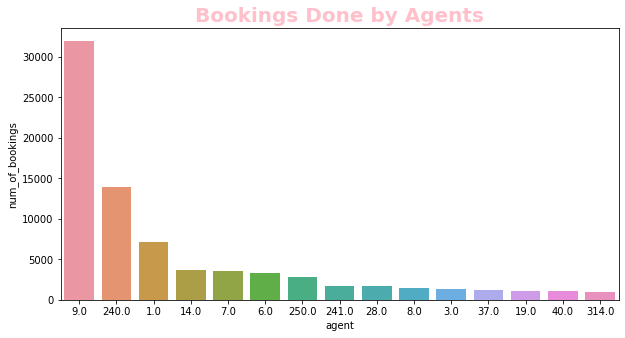

In [72]:
agnt_df = pd.DataFrame(h_book_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
agnt_df.drop(agnt_df[agnt_df['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
agnt_df = agnt_df[:15]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = agnt_df, order = agnt_df.sort_values('num_of_bookings' ,ascending = False).agent)
plt.title( 'Bookings Done by Agents',fontweight="bold", size=20,color='Pink')

Agent no. 9 has made most no. of bookings.

### Most Preferred Room Type

Text(0.5, 1.0, "Preferred Room & it's types")

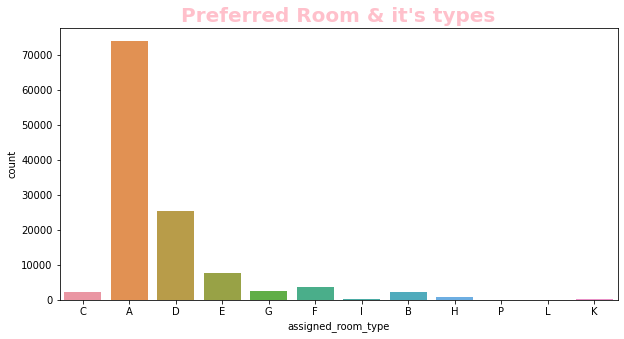

In [73]:
plt.figure(figsize = (10,5))
sns.countplot( x = h_book_df['assigned_room_type'])
plt.title("Preferred Room & it's types",fontweight="bold", size=20,color='Pink')

From the above Graph, It's clearly seen that the most preferred people chooses Type A, types of room.

Text(0.5, 1.0, 'Stay Length in Hotels')

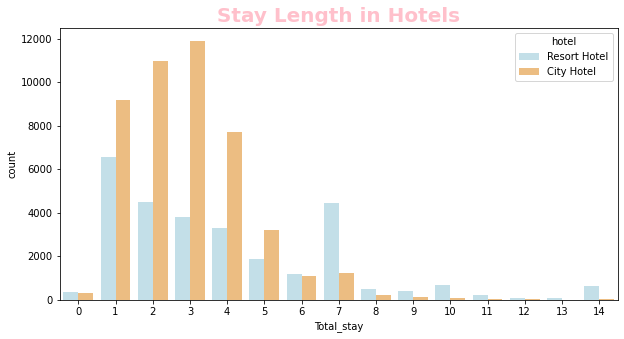

In [74]:
not_canceled = h_book_df[h_book_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['Total_stay'], hue = s1['hotel'],palette='RdYlBu_r')
plt.title('Stay Length in Hotels',fontweight="bold", size=20,color='Pink')

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

Text(0.5, 1.0, 'Booking Preferred with Deposite Type')

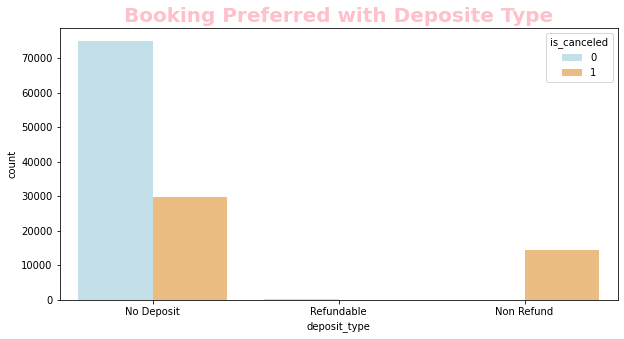

In [75]:
plt.figure(figsize = (10,5))
sns.countplot(x='deposit_type',data=h_book_df,hue ='is_canceled',palette='RdYlBu_r')
plt.title('Booking Preferred with Deposite Type',fontweight="bold", size=20,color='Pink') 

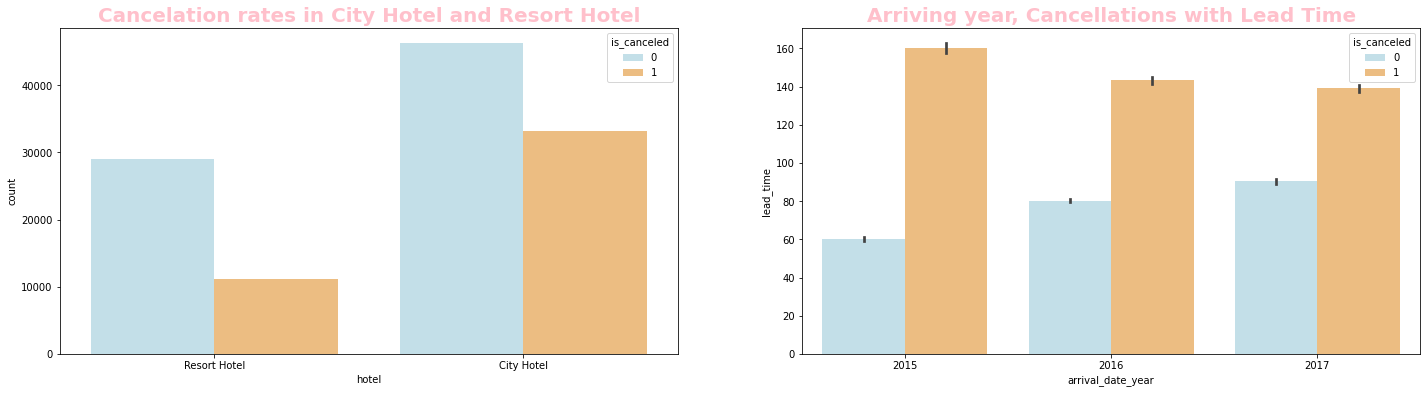

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.countplot(x='hotel',hue="is_canceled",data=h_book_df,palette='RdYlBu_r')
plt.title("Cancelation rates in City Hotel and Resort Hotel",fontweight="bold", size=20,color='Pink')
plt.subplot(1,2,2)
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= h_book_df, palette='RdYlBu_r')
plt.title('Arriving year, Cancellations with Lead Time',fontweight="bold", size=20,color='Pink')
plt.subplots_adjust(right=1.7)

Cancelation rate is higher in city hotel. With lead time more than 100 there is more possibility of cancellation. 